In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors  # [[9]]

# قراءة البيانات
data = pd.read_csv('/kaggle/input/cluster/cleaned_student_data.csv')

In [7]:

print(data.head())
print(data.info())

# اختيار الأعمدة المناسبة
X = data[['Sleep_Duration', 'Study_Hours']]

# تطبيع البيانات (يجب أن يكون أول خطوة قبل التحليل) [[6]][[9]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   Student_ID       Age  University_Year  Sleep_Duration  Study_Hours  \
0    0.000000  0.857143         0.333333            0.74     0.655462   
1    0.002004  0.428571         0.000000            0.46     0.495798   
2    0.004008  0.571429         1.000000            0.22     0.554622   
3    0.006012  0.857143         1.000000            0.46     0.714286   
4    0.008016  0.285714         1.000000            0.14     0.218487   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0     0.800000              0.4           0.308333       1.000000   
1     0.300000              1.0           0.616667       0.111111   
2     0.966667              1.0           0.441667       0.444444   
3     0.600000              0.8           0.458333       0.888889   
4     0.566667              0.0           0.708333       0.222222   

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0             0.627338             0.100251           0.605528   
1             

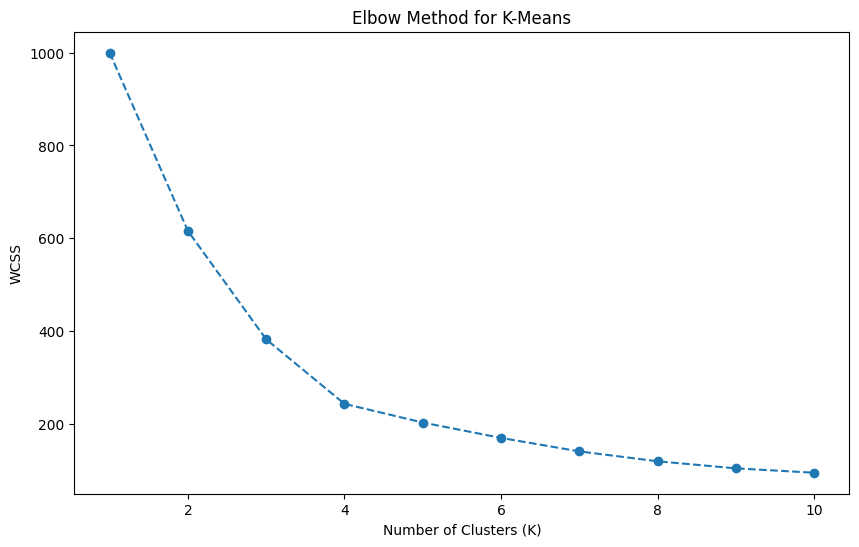

In [ ]:

# =====================================================
# K-Means Clustering
# =====================================================
wcss = []  # قائمة لتخزين قيم WCSS لكل عدد من المجموعات
for k in range(1, 11):  # حلقة لتجربة عدد المجموعات من 1 إلى 10
    # إنشاء نموذج KMeans مع عدد المجموعات المحدد
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)  # تحديد n_init بشكل صريح
    kmeans.fit(X_scaled)  # تدريب النموذج على البيانات المقياس
    wcss.append(kmeans.inertia_)  # إضافة قيمة WCSS الناتجة إلى القائمة

# إعداد الرسم البياني
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')  # رسم WCSS مقابل عدد المجموعات
plt.title('Elbow Method for K-Means')  # عنوان الرسم
plt.xlabel('Number of Clusters (K)')  # تسمية المحور السيني
plt.ylabel('WCSS')  # تسمية المحور الصادي
plt.show()  # عرض الرسم البياني

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


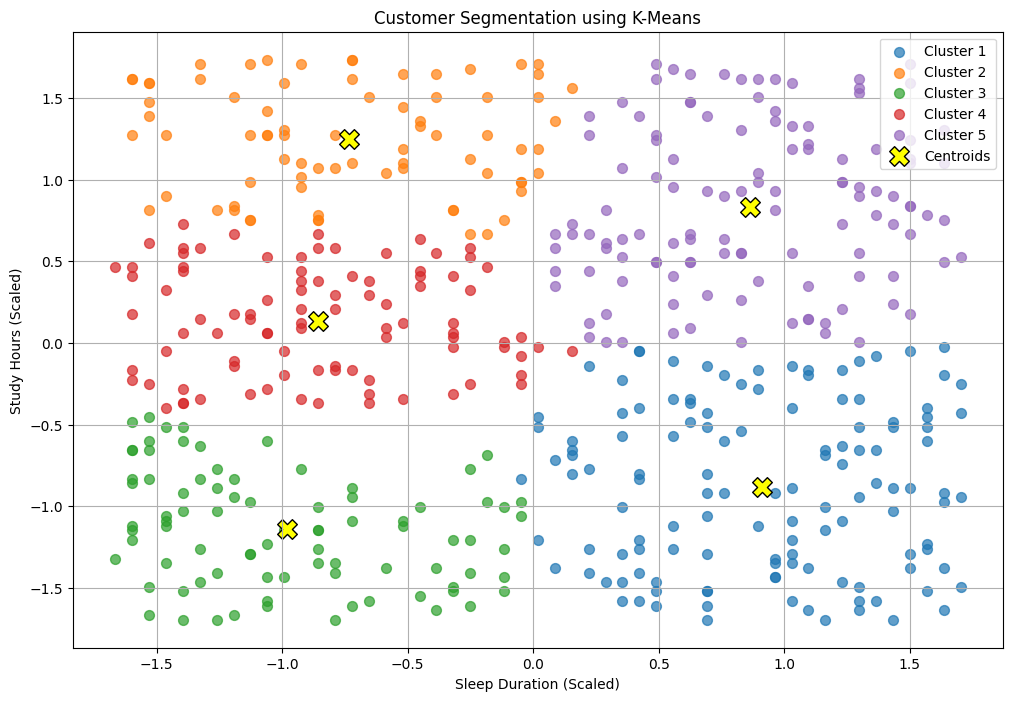

In [ ]:
optimal_k = 5  # تحديد عدد المجموعات المثالي
# إنشاء نموذج KMeans مع عدد المجموعات المحدد
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # تدريب النموذج وتوقع المجموعات

# إضافة المجموعات إلى البيانات الأصلية
data['Cluster'] = clusters  # إضافة عمود يحتوي على معلومات المجموعات

# إعداد الرسم البياني مع تحسين العرض
plt.figure(figsize=(12, 8))  # تعيين حجم الرسم
for i in range(optimal_k):  # حلقة لرسم كل مجموعة
    plt.scatter(X_scaled[clusters == i, 0],  # رسم النقاط للمجموعة الحالية
                X_scaled[clusters == i, 1], 
                label=f'Cluster {i+1}',  # تسمية المجموعة
                s=50,  # حجم النقاط
                alpha=0.7)  # درجة الشفافية

# رسم مراكز المجموعات
plt.scatter(kmeans.cluster_centers_[:, 0],  # إحداثيات مراكز المجموعات
            kmeans.cluster_centers_[:, 1], 
            s=200,  # حجم مراكز المجموعات
            c='yellow',  # لون المراكز
            label='Centroids',  # تسمية مراكز المجموعات
            marker='X',  # شكل المراكز
            edgecolor='black')  # لون حواف المراكز

# إعدادات الرسم البياني
plt.title('Customer Segmentation using K-Means')  # عنوان الرسم
plt.xlabel('Sleep Duration (Scaled)')  # تسمية المحور السيني
plt.ylabel('Study Hours (Scaled)')  # تسمية المحور الصادي
plt.legend()  # عرض وسيلة الإيضاح
plt.grid(True)  # تفعيل الشبكة
plt.show()  # عرض الرسم البياني

In [13]:
# تحليل المجال لكل مجموعة [[8]]
print("تحليل المجموعات:")
for cluster in range(optimal_k):
    subset = data[data['Cluster'] == cluster]
    print(f"\nالمجموعة {cluster+1}:")
    print(f"  عدد الطلاب: {len(subset)}")
    print(f"  متوسط النوم: {subset['Sleep_Duration'].mean():.2f} ساعات")
    print(f"  متوسط الدراسة: {subset['Study_Hours'].mean():.2f} ساعات")
    print(f"  مدى الأعمار: {subset['Age'].min()} - {subset['Age'].max()} سنة")

تحليل المجموعات:

المجموعة 1:
  عدد الطلاب: 127
  متوسط النوم: 0.77 ساعات
  متوسط الدراسة: 0.24 ساعات
  مدى الأعمار: 0.0 - 1.0 سنة

المجموعة 2:
  عدد الطلاب: 77
  متوسط النوم: 0.28 ساعات
  متوسط الدراسة: 0.86 ساعات
  مدى الأعمار: 0.0 - 1.0 سنة

المجموعة 3:
  عدد الطلاب: 84
  متوسط النوم: 0.20 ساعات
  متوسط الدراسة: 0.16 ساعات
  مدى الأعمار: 0.0 - 1.0 سنة

المجموعة 4:
  عدد الطلاب: 93
  متوسط النوم: 0.24 ساعات
  متوسط الدراسة: 0.53 ساعات
  مدى الأعمار: 0.0 - 1.0 سنة

المجموعة 5:
  عدد الطلاب: 119
  متوسط النوم: 0.75 ساعات
  متوسط الدراسة: 0.74 ساعات
  مدى الأعمار: 0.0 - 1.0 سنة


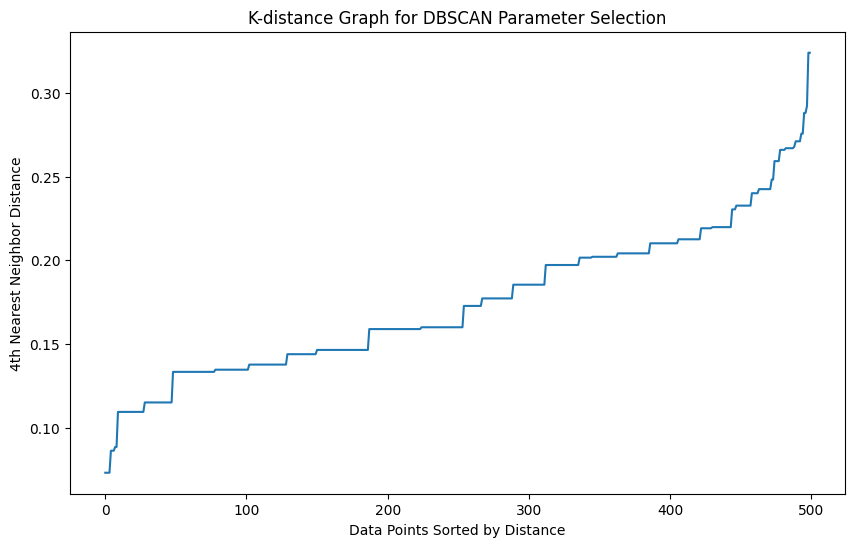

<Figure size 1200x800 with 0 Axes>

In [ ]:
# =====================================================
# DBSCAN Clustering مع تحسينات [[5]][[9]]
# =====================================================
# تحديد الـ eps المناسب باستخدام K-distance graph
nbrs = NearestNeighbors(n_neighbors=5).fit(X_scaled)  # إنشاء نموذج لجيران أقرب 5 نقاط
distances, indices = nbrs.kneighbors(X_scaled)  # الحصول على المسافات وأرقام الجيران الأقرب
plt.figure(figsize=(10, 6))  # تعيين حجم الرسم
plt.plot(np.sort(distances[:, 4]))  # رسم المسافات المرتبة للجيران الرابع
plt.title('K-distance Graph for DBSCAN Parameter Selection')  # عنوان الرسم
plt.xlabel('Data Points Sorted by Distance')  # تسمية المحور السيني
plt.ylabel('4th Nearest Neighbor Distance')  # تسمية المحور الصادي
plt.show()  # عرض الرسم البياني

# تطبيق DBSCAN مع معلمات محسنة
dbscan = DBSCAN(eps=0.4, min_samples=5)  # إنشاء نموذج DBSCAN مع تحديد eps وmin_samples
clusters_dbscan = dbscan.fit_predict(X_scaled)  # تدريب النموذج وتوقع المجموعات

# إضافة المجموعات مع معالجة النقاط الضجيج [[5]]
data['Cluster_DBSCAN'] = clusters_dbscan  # إضافة عمود يحتوي على معلومات المجموعات الناتجة

# رسم النتائج مع تمييز النقاط الضجيج [[5]]
plt.figure(figsize=(12, 8))  # تعيين حجم الرسم
unique_clusters = np.unique(clusters_dbscan)  # الحصول على المجموعات الفريدة
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))  # تحديد ألوان لكل مجموعة فريدة

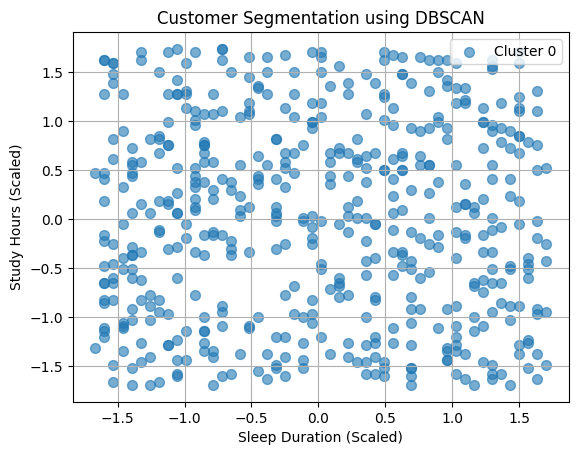

In [20]:
for idx, cluster in enumerate(unique_clusters):
    mask = clusters_dbscan == cluster
    label = f'Cluster {cluster}' if cluster != -1 else 'Noise'
    plt.scatter(X_scaled[mask, 0], 
                X_scaled[mask, 1],
                color=colors[idx] if cluster != -1 else 'gray',
                label=label,
                s=50,
                alpha=0.6 if cluster != -1 else 0.3,
                marker='o' if cluster != -1 else 'x')

plt.title('Customer Segmentation using DBSCAN')
plt.xlabel('Sleep Duration (Scaled)')
plt.ylabel('Study Hours (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:

# تحليل النتائج مع استثناء النقاط الضجيج [[5]]
valid_clusters = clusters_dbscan != -1
print(f"\nعدد النقاط الضجيج: {sum(clusters_dbscan == -1)}")
print(f"عدد المجموعات الفعلية: {len(np.unique(clusters_dbscan[valid_clusters]))}")

cluster_summary_dbscan = data[valid_clusters].groupby('Cluster_DBSCAN')[[
    'Sleep_Duration', 'Study_Hours']].mean()
print("\nملخص المجموعات لـ DBSCAN:")
print(cluster_summary_dbscan)


عدد النقاط الضجيج: 0
عدد المجموعات الفعلية: 1

ملخص المجموعات لـ DBSCAN:
                Sleep_Duration  Study_Hours
Cluster_DBSCAN                             
0                      0.49448     0.494252
